In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import os
import scipy.io as io
%matplotlib inline

### Experiment background
Very similar to Allen Institute setup. Headfixed mouse watching different visual stimuli, while 2-p calcium imaging used to record from neurons in V1 (121 neuron in this data set). 

Three different stimulus types were presented in the following order:
1. Spontaneous activity (blank gray screen presented)
2. Drifting gratings (like in the Allen Institute data)
3. Natural scenes (a 30s sequence of short clips of animals in the woods)

All imaging data was collected at 4 Hz (slower frequency than the Allen data)

### Opening the data

In [2]:
# set this to the path where you've unzipped the data
DATA_DIR = '/Users/rkp/Dropbox/luis_data'

In [3]:
# all the files included in the data
roi_file_name = 'CONTShr.mat'  # rois for each cell
coords_file_name = 'Coordactive.dat'  # coordinates of each cell
dfof_nat_file_name = 'trace_dfof_1_2_nat.mat'  # DF/F for natural scenes
dfof_bar_file_name = 'trace_dfof_bar.mat'  # DF/F for bar stimulus
dfof_spon_file_name = 'trace_dfof_spon.mat'  # DF/F for spontaneous
foopsi_nat_file_name = 'trace_foopsi_1_2_nat.mat'  # spikes for natural scenes
foopsi_bar_file_name = 'trace_foopsi_bar.mat'  # spikes for bar stimulus
foopsi_spon_file_name = 'trace_foopsi_spon.mat'  # spikes for spontaneous
stim_file_name = 'visualstimdata_foopsi.mat'  # parameters for bar stimulus

### View the cell ROIs
Load the cell ROIS from the roi file, which contains their outlines. Then overlay a scatter plot of their calculated centers (in the coord file).

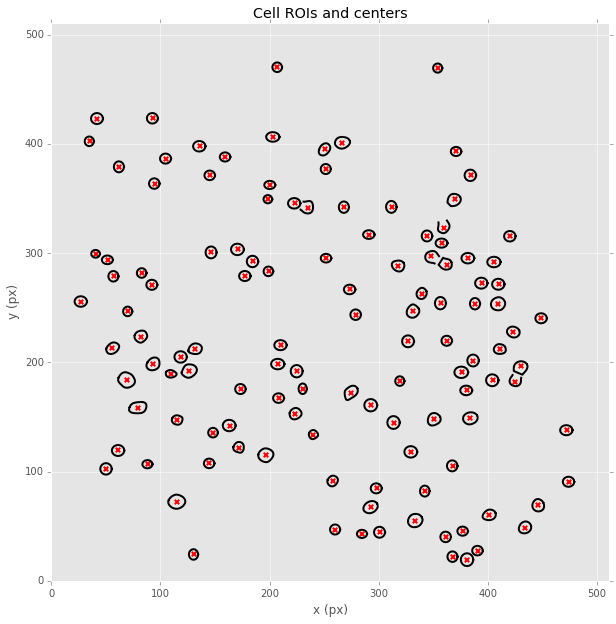

In [4]:
# load rois
rois = io.loadmat(os.path.join(DATA_DIR, roi_file_name))['CONTS'][0]
# load center coordinates
centers = np.loadtxt(os.path.join(DATA_DIR, coords_file_name))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Cell ROIs and centers')
for roi in rois:
    ax.plot(roi[:, 0], roi[:, 1], color='k', lw=2)
ax.scatter(centers[:, 0], centers[:, 1], c='r', marker='x', lw=2)
ax.set_xlim(0, 511)
ax.set_ylim(0, 511)
ax.set_xlabel('x (px)')
ax.set_ylabel('y (px)')

### Load fluorescence traces of spontaneous activity
These are contained in the dfof ($\Delta F/F$) files.

/Users/rkp/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1644: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


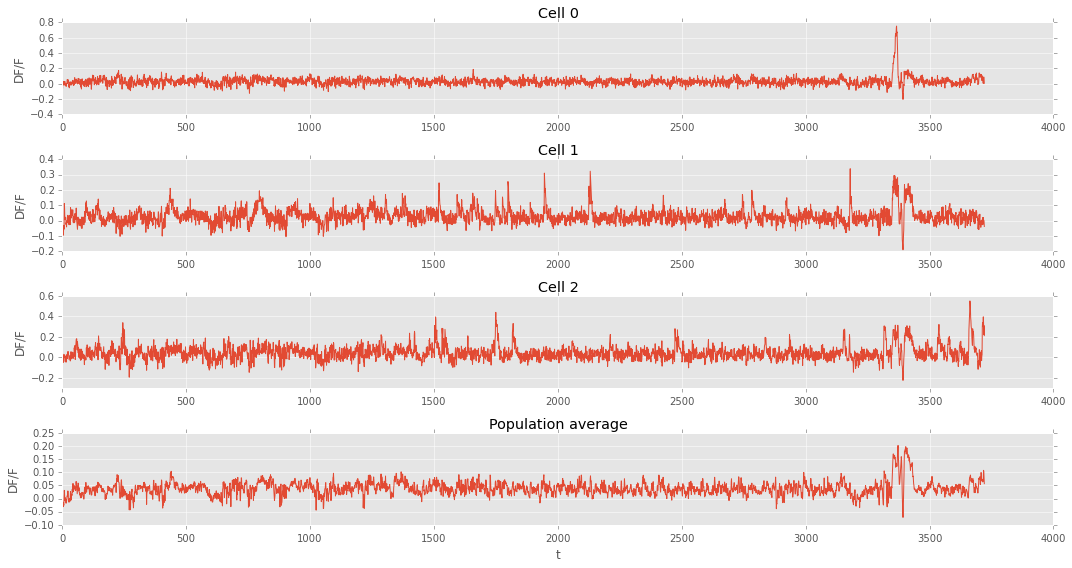

In [5]:
# get the calcium traces from spontaneous activity
dfof_spon = io.loadmat(os.path.join(DATA_DIR, dfof_spon_file_name))['dfof']  # array of size (n_cells, n_timepoints)

# plot a few example cells and the population mean
fig, axs = plt.subplots(4, 1, figsize=(15, 8), tight_layout=True)

for ctr, ax in enumerate(axs):
                         
    if ctr < len(axs) - 1:
        # plot example cells
        
        ax.set_title('Cell {}'.format(ctr))
        ax.plot(dfof_spon[ctr])
        
    elif ctr == len(axs) - 1:
        # plot population mean
        
        ax.set_title('Population average')
        ax.plot(dfof_spon.mean(axis=0))
        
    ax.set_ylabel('DF/F')
    
axs[-1].set_xlabel('t')

### Look at the spike probabilities extracted using the Foopsi algorithm
These are contained in the foopsi files.

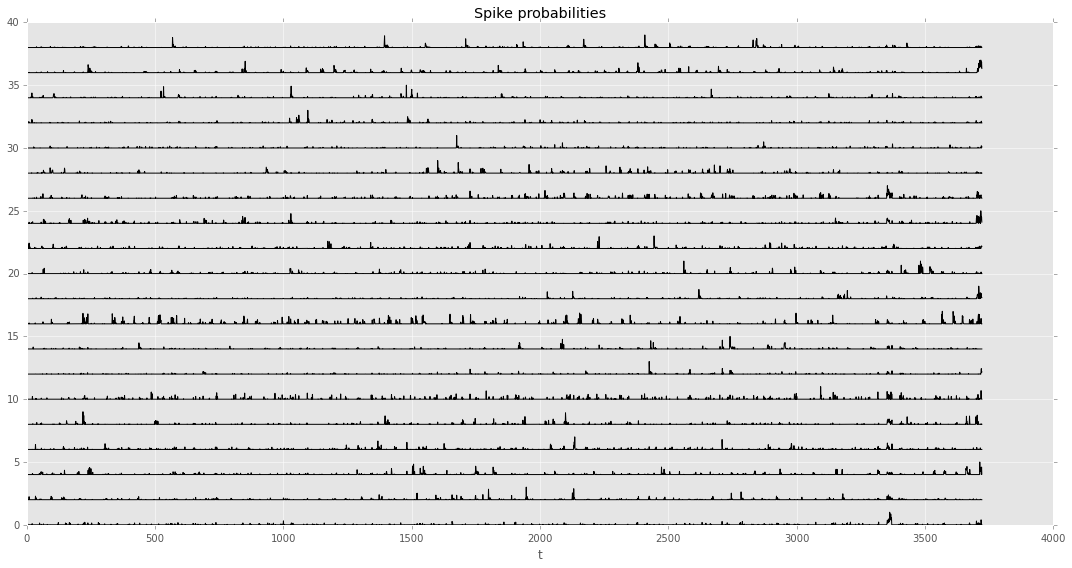

In [6]:
# load the spikes extracted from spontaneous activity
spike_probs_spon = io.loadmat(os.path.join(DATA_DIR, foopsi_spon_file_name))['Traces_spon1_2_registered_1']

# plot a handful of spike trains
fig, ax = plt.subplots(1, 1, figsize=(15, 8), tight_layout=True)

ax.set_title('Spike probabilities')

for ctr, spike_prob in enumerate(spike_probs_spon[:20]):
    ax.plot(spike_prob + 2*ctr, color='k')

ax.set_xlabel('t')

### Load fluorescence traces for gratings-driven activity

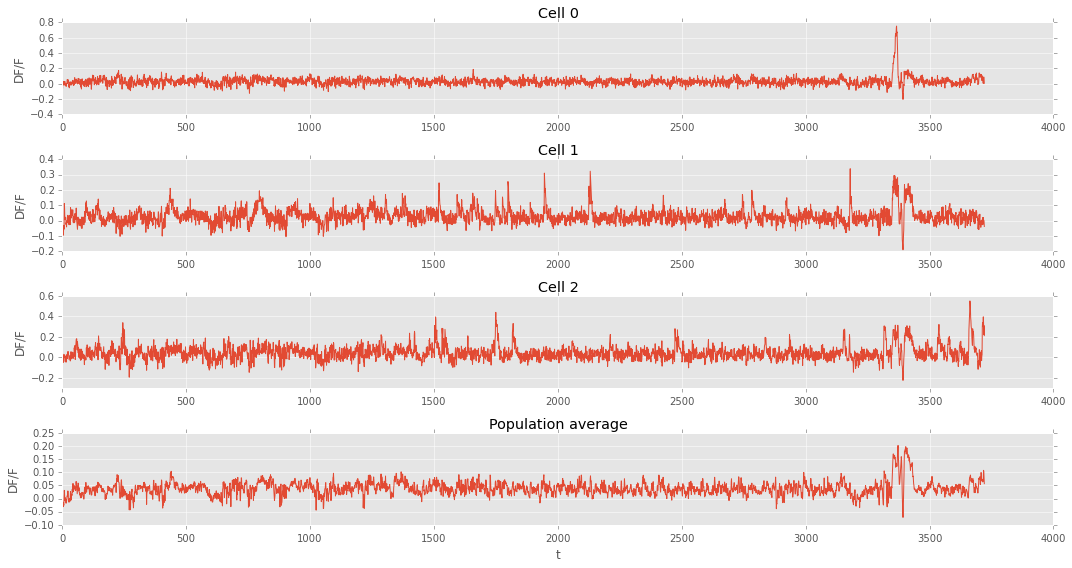

In [7]:
# get the calcium traces from gratings-driven activity
dfof_bar = io.loadmat(os.path.join(DATA_DIR, dfof_bar_file_name))['dfof']  # array of size (n_cells, n_timepoints)

# plot a few example cells and the population mean
fig, axs = plt.subplots(4, 1, figsize=(15, 8), tight_layout=True)

for ctr, ax in enumerate(axs):
                         
    if ctr < len(axs) - 1:
        # plot example cells
        
        ax.set_title('Cell {}'.format(ctr))
        ax.plot(dfof_spon[ctr])
        
    elif ctr == len(axs) - 1:
        # plot population mean
        
        ax.set_title('Population average')
        ax.plot(dfof_spon.mean(axis=0))
        
    ax.set_ylabel('DF/F')
    
axs[-1].set_xlabel('t')

### Load the metadata about stimulus timing for gratings

In [8]:
stim_data = io.loadmat(os.path.join(DATA_DIR, stim_file_name))

In [9]:
# print sequence of orientations
print(stim_data['orientation'])

[[270]
 [ 45]
 [135]
 [  0]
 [ 90]
 [315]
 [225]
 [180]
 [  0]
 [270]
 [180]
 [ 45]
 [ 90]
 [315]
 [135]
 [225]
 [225]
 [315]
 [180]
 [ 45]
 [  0]
 [135]
 [ 90]
 [270]
 [  0]
 [180]
 [225]
 [270]
 [ 45]
 [135]
 [ 90]
 [315]
 [315]
 [  0]
 [180]
 [135]
 [225]
 [270]
 [ 90]
 [ 45]
 [ 45]
 [180]
 [315]
 [225]
 [ 90]
 [135]
 [  0]
 [270]
 [225]
 [135]
 [180]
 [ 90]
 [  0]
 [315]
 [270]
 [ 45]
 [135]
 [270]
 [315]
 [ 45]
 [225]
 [180]
 [ 90]
 [  0]
 [315]
 [ 45]
 [  0]
 [135]
 [ 90]
 [270]
 [180]
 [225]
 [  0]
 [ 45]
 [180]
 [ 90]
 [135]
 [270]
 [225]
 [315]]


In [10]:
# print frames that each orientation was presented
print(stim_data['oriframes'])

[[ 165  185    0]
 [ 370  391    0]
 [ 862  882    0]
 [1026 1046    0]
 [1395 1415    0]
 [1927 1948    0]
 [2173 2193    0]
 [2624 2644    0]
 [2747 2767    0]
 [2992 3013    0]
 [  83  104   45]
 [ 493  513   45]
 [ 821  841   45]
 [1190 1210   45]
 [1640 1661   45]
 [1681 1702   45]
 [2296 2316   45]
 [2460 2480   45]
 [2706 2726   45]
 [3033 3054   45]
 [ 206  226   90]
 [ 534  554   90]
 [ 944  964   90]
 [1271 1292   90]
 [1599 1620   90]
 [1845 1866   90]
 [2132 2152   90]
 [2583 2603   90]
 [2828 2849   90]
 [3115 3135   90]
 [ 124  144  135]
 [ 616  636  135]
 [ 903  923  135]
 [1231 1251  135]
 [1477 1497  135]
 [1886 1907  135]
 [2050 2071  135]
 [2337 2357  135]
 [2787 2808  135]
 [3156 3176  135]
 [ 329  350  180]
 [ 452  472  180]
 [ 780  800  180]
 [1067 1087  180]
 [1436 1456  180]
 [1722 1743  180]
 [2091 2112  180]
 [2542 2562  180]
 [2910 2930  180]
 [3074 3094  180]
 [ 288  308  225]
 [ 657  678  225]
 [ 698  718  225]
 [1108 1128  225]
 [1517 1538  225]
 [1804 182